# SPOTIFY HIT PREDICTIONS

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
import time

In [2]:
import sklearn
print(sklearn.__version__)


1.4.2


In [3]:

from sklearn.neighbors import KNeighborsClassifier
help(KNeighborsClassifier)


Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [2]:
data = pd.read_csv("datos3.csv")
data = data.iloc[:,2:]

In [3]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre,featuring
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,edm,0
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,pop,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,pop,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,pop,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,r&b,0


In [6]:
data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_s          float64
time_signature        int64
chorus_hit          float64
sections              int64
popularity            int64
decade               object
genre                object
featuring             int64
dtype: object

In [3]:
genre_mapping = {'edm': 1, 'pop': 2, 'rap': 3, 'r&b': 4, 'latin': 5, 'rock': 6}

data['genre'] = data['genre'].replace(genre_mapping)


In [4]:
decade_mapping = {'60s': 1, '70s': 2, '80s': 3, '90s': 4, '00s': 5, '10s': 6}

data['decade'] = data['decade'].replace(decade_mapping)


In [5]:
data['decade'] = data['decade'].astype('category')
data['key'] = data['key'].astype('category')
data['mode'] = data['mode'].astype('category')
data['time_signature'] = data['time_signature'].astype('category')
data['popularity'] = data['popularity'].astype('category')
data['featuring'] = data['featuring'].astype('category')

In [6]:
X = data.drop(columns=['popularity'])  
y = data['popularity']  



In [7]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
X_test = pd.DataFrame(preprocessing.robust_scale(X_test), index=X_test.index)
X_train = pd.DataFrame(preprocessing.robust_scale(X_train), index=X_train.index)

In [56]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
1256,0.709016,-0.449086,-1.008211,-0.073171,0.099578,-0.035471,-0.058207,0.659624,0.212925,-0.556285,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11237,-0.233607,0.161880,0.189313,0.146341,0.832068,-0.035580,0.279395,0.363850,-0.947739,-0.317976,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11285,0.094262,-0.741514,-0.340393,-0.429878,1.095359,-0.025073,-0.279977,-0.455399,0.965752,-0.285486,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5385,-0.340164,-0.671018,-0.313276,-0.286585,1.122363,1.925299,-0.040745,-0.438967,-0.506346,-0.612705,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2640,-0.278689,-0.890339,-0.270832,-0.356707,0.477637,6.596724,0.436554,-0.286385,0.217918,-1.483970,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,1.168033,0.211488,0.729799,0.115854,-0.282025,-0.014638,1.024447,0.713615,0.202267,0.066800,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21575,0.422131,0.825065,0.923660,0.975610,-0.364613,-0.034605,1.298021,-0.103286,0.350910,0.263286,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.336066,-0.015666,-0.435892,0.460366,0.005063,-0.034983,-0.495925,0.718310,-0.787256,0.724116,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
860,-0.065574,0.221932,0.046486,-0.323171,0.946835,-0.034871,1.344587,0.413146,-0.525674,-1.103758,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# KNN

In [10]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_test = pd.DataFrame(preprocessing.robust_scale(X_test), index=X_test.index)
X_train = pd.DataFrame(preprocessing.robust_scale(X_train), index=X_train.index)

In [12]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de KNN sin ajuste de hiperparámetros:", accuracy)

Precisión del modelo de KNN sin ajuste de hiperparámetros: 0.7517437145174372


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [14]:
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo con mejores parámetros:", accuracy)
sensitivity = recall_score(y_test, y_pred, average='binary')
print("Sensibilidad del modelo:", sensitivity)

true_positives = sum((y_test == 1) & (y_pred == 1))
true_negatives = sum((y_test == 0) & (y_pred == 0))
false_positives = sum((y_test == 0) & (y_pred == 1))
false_negatives = sum((y_test == 1) & (y_pred == 0))

specificity = true_negatives / (true_negatives + false_positives)
print("Especificidad del modelo:", specificity)

f1 = f1_score(y_test, y_pred, average='binary')
print("Puntaje F1 del modelo:", f1)

Mejores parámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Exactitud del modelo con mejores parámetros: 0.7688564476885644
Sensibilidad del modelo: 0.8924922977136371
Especificidad del modelo: 0.6451403537238358
Puntaje F1 del modelo: 0.7943426179823928


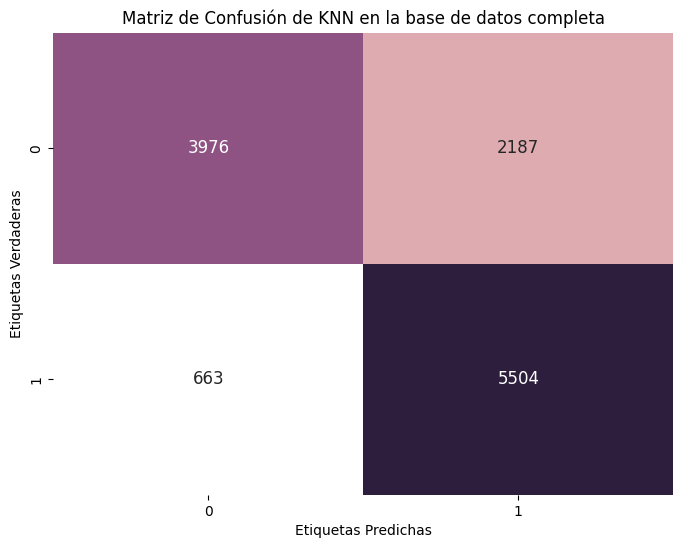

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Configurar colores personalizados
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap=cmap, fmt="d", cbar=False, annot_kws={"size": 12})
plt.title("Matriz de Confusión de KNN en la base de datos completa")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

In [ ]:
from joblib import dump
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

best_knn.fit(X_combined, y_combined)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [ ]:
import joblib
joblib.dump(best_knn, 'modelo__knn_mixto.pkl')

['modelo__knn_mixto.pkl']

# RandomForest

In [18]:
X = data.drop(columns=['popularity']) 
y = data['popularity'] 


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_test = pd.DataFrame(preprocessing.robust_scale(X_test), index=X_test.index)
X_train = pd.DataFrame(preprocessing.robust_scale(X_train), index=X_train.index)

In [21]:
random_forest = RandomForestClassifier(random_state=42)


random_forest.fit(X_train, y_train)


y_pred = random_forest.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8032441200324412


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [23]:
best_params = random_search.best_params_
print("Mejores parámetros encontrados:", best_params)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo con mejores parámetros:", accuracy)
sensitivity = recall_score(y_test, y_pred, average='binary')
print("Sensibilidad del modelo:", sensitivity)

true_positives = sum((y_test == 1) & (y_pred == 1))
true_negatives = sum((y_test == 0) & (y_pred == 0))
false_positives = sum((y_test == 0) & (y_pred == 1))
false_negatives = sum((y_test == 1) & (y_pred == 0))

specificity = true_negatives / (true_negatives + false_positives)
print("Especificidad del modelo:", specificity)

f1 = f1_score(y_test, y_pred, average='binary')
print("Puntaje F1 del modelo:", f1)

Mejores parámetros encontrados: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Exactitud del modelo con mejores parámetros: 0.805433901054339
Sensibilidad del modelo: 0.8422247446083996
Especificidad del modelo: 0.7686191789712802
Puntaje F1 del modelo: 0.8123875811370923


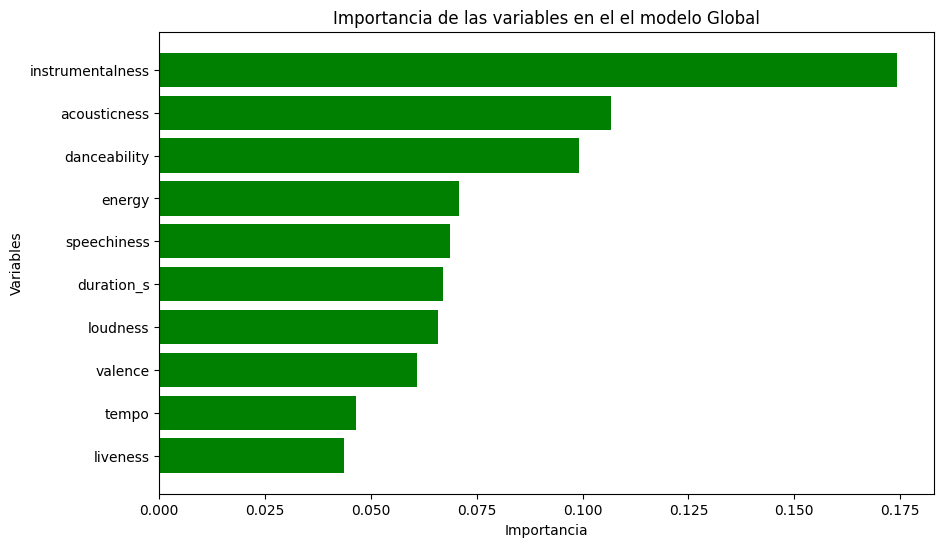

In [26]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Obtener la importancia de las variables del mejor modelo
importances = best_rf.feature_importances_

# Obtener los nombres de las variables
feature_names = X_train.columns

# Ordenar las importancias de las variables en orden descendente
sorted_indices = importances.argsort()[::-1]

# Obtener las 10 variables más importantes
top_features = feature_names[sorted_indices][:10]
top_importances = importances[sorted_indices][:10]

# Crear el gráfico de barras de las 10 variables más importantes con el orden invertido
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1], color='green')  # Orden invertido
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en el el modelo Global')
plt.show()


In [25]:
from joblib import dump

# Guardar el mejor modelo RandomForestClassifier en disco
dump(best_rf, 'modelo_rf_global.joblib')

['modelo_rf_global.joblib']

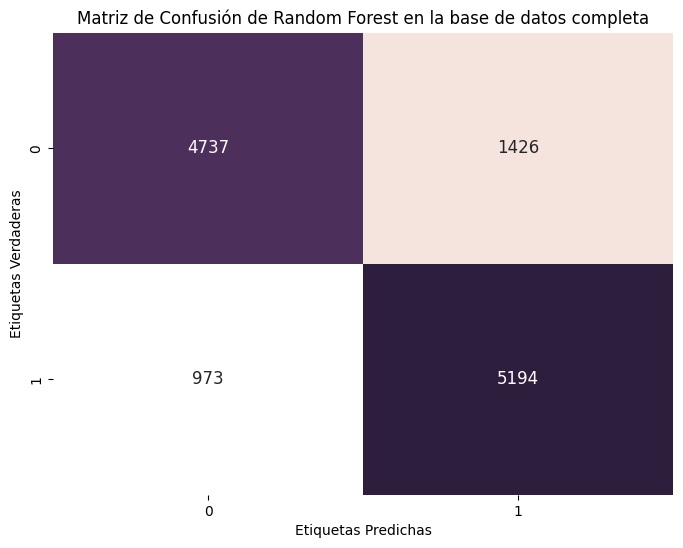

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Configurar colores personalizados
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap=cmap, fmt="d", cbar=False, annot_kws={"size": 12})
plt.title("Matriz de Confusión de Random Forest en la base de datos completa")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.show()


# SVM


In [9]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
X_test = pd.DataFrame(preprocessing.robust_scale(X_test), index=X_test.index)
X_train = pd.DataFrame(preprocessing.robust_scale(X_train), index=X_train.index)

In [11]:
inicio = time.time()
svm_classifier = SVC()

# Entrenar el clasificador
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = svm_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", accuracy)
tiempo_ejecucion = time.time() - inicio
print("Tiempo de ejecución:", tiempo_ejecucion, "segundos")

Precisión del modelo SVM: 0.789375506893755
Tiempo de ejecución: 143.99420714378357 segundos


In [15]:
inicio = time.time()
param_dist = {
    'C': [0.1, 1, 10],           # Parámetro de regularización
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1]
}

# Crear el clasificador SVM
svm_classifier = SVC()

# Instanciar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = random_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo SVM con los mejores parámetros
best_svm = random_search.best_estimator_

# Realizar predicciones en los datos de prueba
y_pred = best_svm.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM con mejores parámetros:", accuracy)
tiempo_ejecucion = time.time() - inicio
print("Tiempo de ejecución:", tiempo_ejecucion, "segundos")

c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Precisión del modelo SVM con mejores parámetros: 0.8036496350364963
Tiempo de ejecución: 9012.748754739761 segundos


In [16]:
vectores_soporte = best_svm.support_vectors_

import numpy as np
caracteristicas_frecuentes = np.mean(vectores_soporte, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for columna, valor in zip(X_train.columns, caracteristicas_frecuentes):
    print(columna, ':', valor)

danceability : -0.0027577349322639353
energy : -0.02145915812574891
loudness : -0.0730575583239615
speechiness : 0.8919985733586784
acousticness : 0.17409712506364458
instrumentalness : 1.4017667666465234
liveness : 0.4962007201734249
valence : 0.053511952182504076
tempo : 0.07941847228064468
duration_s : 0.19252549932175922
chorus_hit : 0.24965861463099376
sections : 0.12810771179097513
genre : -0.35746184096514033
key_0 : 0.13004065853495966
key_1 : 0.07211890955142305
key_2 : 0.11710991135106312
key_3 : 0.03126041458374992
key_4 : 0.08191694994334467
key_5 : 0.08891555022328868
key_6 : 0.050923148703592616
key_7 : 0.1277744451109778
key_8 : 0.05312270879157502
key_9 : 0.11371059121509032
key_10 : 0.061854295807505164
key_11 : 0.07125241618342998
mode_0 : 0.29674065186962606
mode_1 : -0.29674065186962606
time_signature_0 : 0.0
time_signature_1 : 0.007598480303939212
time_signature_3 : 0.08691595014330467
time_signature_4 : -0.10584549756715324
time_signature_5 : 0.011331067119909352


In [17]:
import joblib

best_params = random_search.best_params_
print("Mejores parámetros encontrados:", best_params)

best_svm = random_search.best_estimator_

# Guardar el modelo
joblib.dump(best_svm, 'modelo_svm_global.pkl')

Mejores parámetros encontrados: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


['modelo_svm_global.pkl']

In [27]:
best_params = random_search.best_params_
print("Mejores parámetros encontrados:", best_params)

best_svm = random_search.best_estimator_

y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo con mejores parámetros:", accuracy)
sensitivity = recall_score(y_test, y_pred, average='binary')
print("Sensibilidad del modelo:", sensitivity)

true_positives = sum((y_test == 1) & (y_pred == 1))
true_negatives = sum((y_test == 0) & (y_pred == 0))
false_positives = sum((y_test == 0) & (y_pred == 1))
false_negatives = sum((y_test == 1) & (y_pred == 0))

specificity = true_negatives / (true_negatives + false_positives)
print("Especificidad del modelo:", specificity)

f1 = f1_score(y_test, y_pred, average='binary')
print("Puntaje F1 del modelo:", f1)

Mejores parámetros encontrados: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
Exactitud del modelo con mejores parámetros: 0.8036496350364963
Sensibilidad del modelo: 0.8668720609696773
Especificidad del modelo: 0.7403861755638488
Puntaje F1 del modelo: 0.8153740562800275


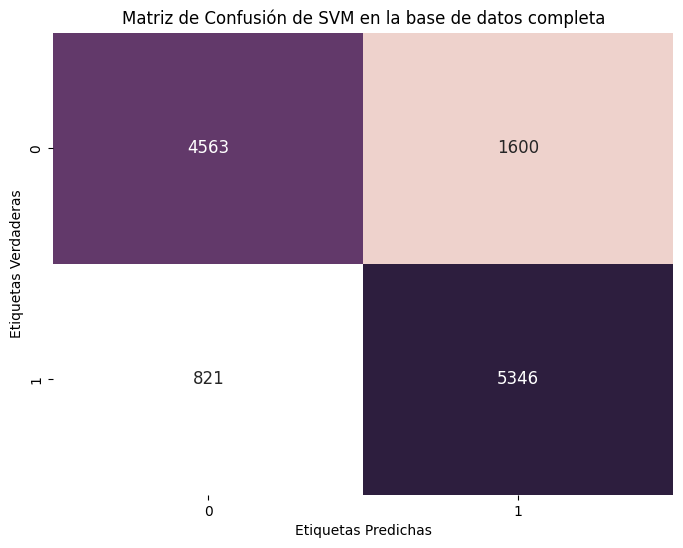

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Configurar colores personalizados
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap=cmap, fmt="d", cbar=False, annot_kws={"size": 12})
plt.title("Matriz de Confusión de SVM en la base de datos completa")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

### REDES

In [7]:
X = data.drop(columns=['popularity'])  
y = data['popularity']  

In [8]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
X_test = pd.DataFrame(preprocessing.robust_scale(X_test), index=X_test.index)
X_train = pd.DataFrame(preprocessing.robust_scale(X_train), index=X_train.index)

In [10]:
mlp_classifier = MLPClassifier(random_state=42)

# Entrenar el clasificador con los datos de entrenamiento
mlp_classifier.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = mlp_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de red neuronal:", accuracy)

Precisión del modelo de red neuronal: 0.8005677210056772


c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'relu','sigmoid'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Crear el clasificador de red neuronal
mlp_classifier = MLPClassifier(random_state=42)

# Instanciar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria de hiperparámetros en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = random_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo con los mejores parámetros
best_mlp = random_search.best_estimator_

# Realizar predicciones en los datos de prueba
y_pred = best_mlp.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de red neuronal con mejores parámetros:", accuracy)

c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Mejores parámetros encontrados: {'hidden_layer_sizes': (50,), 'alpha': 0.0001, 'activation': 'logistic'}
Precisión del modelo de red neuronal con mejores parámetros: 0.8105433901054339


c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
sensitivity = recall_score(y_test, y_pred, average='binary')
print("Sensibilidad del modelo:", sensitivity)

true_positives = sum((y_test == 1) & (y_pred == 1))
true_negatives = sum((y_test == 0) & (y_pred == 0))
false_positives = sum((y_test == 0) & (y_pred == 1))
false_negatives = sum((y_test == 1) & (y_pred == 0))

specificity = true_negatives / (true_negatives + false_positives)
print("Especificidad del modelo:", specificity)

f1 = f1_score(y_test, y_pred, average='binary')
print("Puntaje F1 del modelo:", f1)

Sensibilidad del modelo: 0.8511431814496514
Especificidad del modelo: 0.769917248093461
Puntaje F1 del modelo: 0.8179834813775908


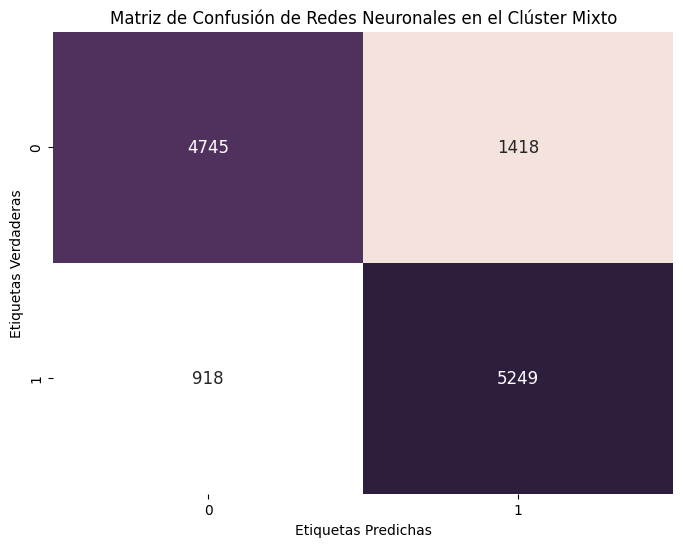

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Configurar colores personalizados
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap=cmap, fmt="d", cbar=False, annot_kws={"size": 12})
plt.title("Matriz de Confusión de Redes Neuronales en el Clúster Mixto")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

In [15]:
from joblib import dump
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

best_mlp.fit(X_combined, y_combined)


c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), random_state=42)

In [16]:
import joblib
joblib.dump(best_mlp, 'modelo_redes_global.pkl')

['modelo_redes_global.pkl']

In [19]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_test = pd.DataFrame(preprocessing.robust_scale(X_test), index=X_test.index)
X_train = pd.DataFrame(preprocessing.robust_scale(X_train), index=X_train.index)

In [23]:
import numpy as np

# Convertir las etiquetas de clase a un arreglo NumPy
y_train = np.array(y_train)


In [18]:
X_train.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
dtype: object

In [13]:
import tensorflow as tf
from tensorflow.keras import regularizers

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\leire\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         9,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,249 (208.00 KB)

 Trainable params: 53,249 (208.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Precisión:", accuracy)
print("Classification Report:\n", report)

Epoch 1/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5608 - loss: 3.7916 - val_accuracy: 0.6911 - val_loss: 2.4986
Epoch 2/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6925 - loss: 2.2162 - val_accuracy: 0.7076 - val_loss: 1.5727
Epoch 3/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7027 - loss: 1.4444 - val_accuracy: 0.7218 - val_loss: 1.1327
Epoch 4/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7176 - loss: 1.0697 - val_accuracy: 0.7294 - val_loss: 0.9196
Epoch 5/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7312 - loss: 0.8853 - val_accuracy: 0.7472 - val_loss: 0.8056
Epoch 6/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7428 - loss: 0.7904 - val_accuracy: 0.7478 - val_loss: 0.7488
Epoch 7/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7480 - loss: 0.7400 - val_accuracy: 0.7547 - val_loss: 0.7094
Epoch 8/100
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7507 - loss: 0.7053 - val_accu

In [22]:
y_train

1256     1
11237    1
11285    0
5385     0
2640     0
        ..
11964    1
21575    1
5390     1
860      1
15795    0
Name: popularity, Length: 15796, dtype: category
Categories (2, int64): [0, 1]